In [17]:
import os
import pandas as pd 
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
from pltKorean_mac2 import Fontmanager

Fontmanager().set_font()

Using font : {self.ttf_path}
Set font to: Arial Unicode MS


In [2]:
data_path = "/Users/jun/GitStudy/commerceAB/data/thelook_ecommerce"
data_list = os.listdir(data_path)
data_list.sort()
data_list

['distribution_centers_gzip.parquet',
 'inventory_items_gzip.parquet',
 'order_items_gzip.parquet',
 'orders_gzip.parquet',
 'products_gzip.parquet',
 'users_gzip.parquet']

In [3]:
cols = [i.rstrip("_gzip.parquet") for i in data_list ]

cols

['distribution_centers',
 'inventory_items',
 'order_items',
 'orders',
 'products',
 'users']

In [ ]:
order_items_file_path = data_path + "/order_items_gzip.parquet"
order_items_df = pd.read_parquet(order_items_file_path, engine='pyarrow')  # 또는 engine='fastparquet'

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124599 entries, 0 to 124598
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   order_id      124599 non-null  Int64              
 1   user_id       124599 non-null  Int64              
 2   status        124599 non-null  object             
 3   gender        124599 non-null  object             
 4   created_at    124599 non-null  datetime64[ns, UTC]
 5   returned_at   12589 non-null   datetime64[ns, UTC]
 6   shipped_at    80886 non-null   datetime64[ns, UTC]
 7   delivered_at  43700 non-null   datetime64[ns, UTC]
 8   num_of_item   124599 non-null  Int64              
dtypes: Int64(3), datetime64[ns, UTC](4), object(2)
memory usage: 8.9+ MB


In [ ]:
order_items_df.describe(include='all',datetime_is_numeric=True)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
count,124599.0,124599.0,124599,124599,124599,12589,80886,43700,124599.0
unique,<NA>,<NA>,5,2,NaN,NaN,NaN,NaN,<NA>
top,<NA>,<NA>,Shipped,F,NaN,NaN,NaN,NaN,<NA>
freq,<NA>,<NA>,37186,62734,NaN,NaN,NaN,NaN,<NA>
mean,62300.0,49934.491208,NaN,NaN,2024-02-11 09:49:37.102870528+00:00,2024-02-17 09:36:46.777577472+00:00,2024-02-14 02:54:39.809930496+00:00,2024-02-15 12:59:05.400092672+00:00,1.450589
min,1.0,1.0,NaN,NaN,2019-01-13 17:33:00+00:00,2019-01-18 07:54:00+00:00,2019-01-14 05:45:00+00:00,2019-01-15 16:18:00+00:00,1.0
25%,31150.5,24990.0,NaN,NaN,2023-03-19 03:18:00+00:00,2023-03-26 01:17:00+00:00,2023-03-22 23:37:15+00:00,2023-03-25 02:18:00+00:00,1.0
50%,62300.0,49888.0,NaN,NaN,2024-07-20 17:13:00+00:00,2024-07-22 00:07:00+00:00,2024-07-24 07:39:00+00:00,2024-07-25 17:01:00+00:00,1.0
75%,93449.5,74925.0,NaN,NaN,2025-05-10 10:59:30+00:00,2025-05-12 21:08:00+00:00,2025-05-13 01:46:15+00:00,2025-05-14 17:03:00+00:00,2.0
max,124599.0,100000.0,NaN,NaN,2025-10-08 19:32:25.712857+00:00,2025-10-17 22:10:55.822944+00:00,2025-10-11 18:32:39.370171+00:00,2025-10-16 06:09:12.596329+00:00,4.0


In [ ]:
order_items_df.isnull().sum()

order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112010
shipped_at       43713
delivered_at     80899
num_of_item          0
dtype: int64

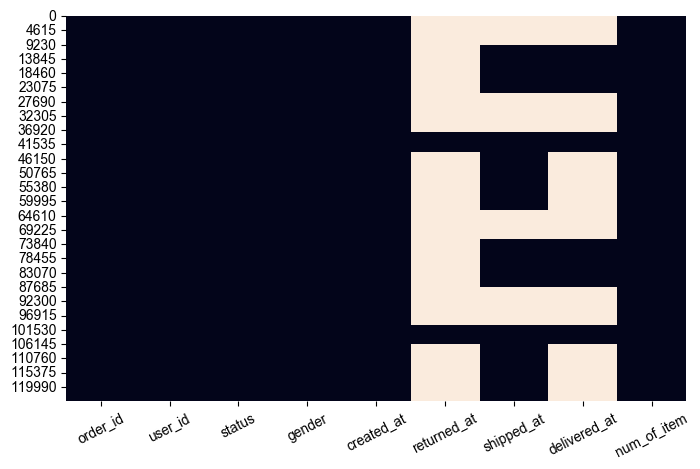

In [ ]:
plt.figure(figsize=(8,5))  # 전체 그림 크기 지정
sns.heatmap(order_items_df.isnull(), cbar=False)
plt.xticks(rotation=27)  # x축 라벨 기울이기
plt.show()